In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## Load and inspect data

In [2]:
xem_df = pd.read_csv(Path('../../resources/prices/coin_NEM.csv'), index_col='SNo')
xem_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,NEM,XEM,2015-04-02 23:59:59,0.000323,0.000227,0.000242,0.000314,2.854940e+04,2.823534e+06
2,NEM,XEM,2015-04-03 23:59:59,0.000330,0.000291,0.000309,0.000310,2.067790e+04,2.792457e+06
3,NEM,XEM,2015-04-04 23:59:59,0.000318,0.000251,0.000310,0.000277,2.355020e+04,2.488770e+06
4,NEM,XEM,2015-04-05 23:59:59,0.000283,0.000218,0.000272,0.000232,2.680020e+04,2.087388e+06
5,NEM,XEM,2015-04-06 23:59:59,0.000299,0.000229,0.000232,0.000289,2.251150e+04,2.598354e+06
...,...,...,...,...,...,...,...,...,...
2155,NEM,XEM,2021-02-23 23:59:59,0.736226,0.448790,0.707942,0.536204,1.941563e+09,4.825836e+09
2156,NEM,XEM,2021-02-24 23:59:59,0.566093,0.498564,0.538532,0.534637,6.256875e+08,4.811729e+09
2157,NEM,XEM,2021-02-25 23:59:59,0.540221,0.493645,0.534928,0.495290,2.707985e+08,4.457607e+09


In [3]:
xem_df['Date'] = pd.to_datetime(xem_df['Date']).dt.date
xem_df['Date'] = pd.to_datetime(xem_df['Date'])
xem_df['Spread'] = xem_df.High - xem_df.Low
xem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 1 to 2159
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       2159 non-null   object        
 1   Symbol     2159 non-null   object        
 2   Date       2159 non-null   datetime64[ns]
 3   High       2159 non-null   float64       
 4   Low        2159 non-null   float64       
 5   Open       2159 non-null   float64       
 6   Close      2159 non-null   float64       
 7   Volume     2159 non-null   float64       
 8   Marketcap  2159 non-null   float64       
 9   Spread     2159 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 185.5+ KB


## Plot the closing value of XMR over time

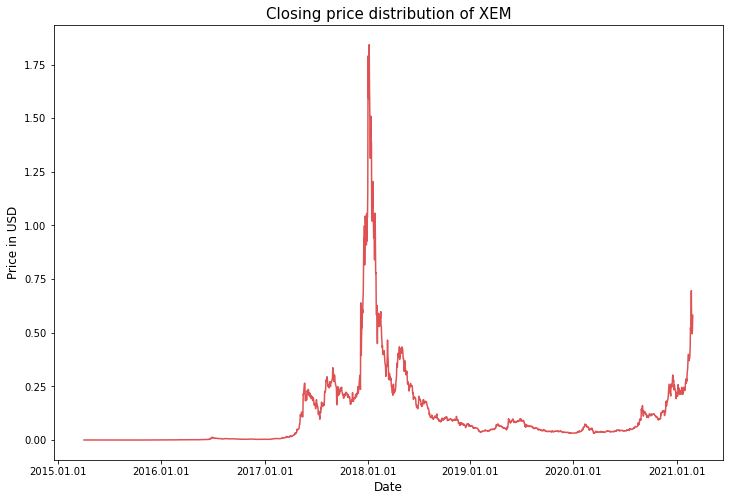

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = xem_df.Close.values, x=xem_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = xem_df.Close.values, x=xem_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of XEM", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

xem_df['Date_mpl'] = xem_df['Date'].apply(lambda x: mdates.date2num(x))

temp_xem_df = xem_df.copy(deep=False)
temp_xem_df = temp_xem_df.set_index(['Date'])
temp_xem_df = temp_xem_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_xem_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2015-04-02,0.000323,0.000227,0.000242,0.000314,2.854940e+04,16527.0
2015-04-03,0.000330,0.000291,0.000309,0.000310,2.067790e+04,16528.0
2015-04-04,0.000318,0.000251,0.000310,0.000277,2.355020e+04,16529.0
2015-04-05,0.000283,0.000218,0.000272,0.000232,2.680020e+04,16530.0
2015-04-06,0.000299,0.000229,0.000232,0.000289,2.251150e+04,16531.0
...,...,...,...,...,...,...
2021-02-23,0.736226,0.448790,0.707942,0.536204,1.941563e+09,18681.0
2021-02-24,0.566093,0.498564,0.538532,0.534637,6.256875e+08,18682.0
2021-02-25,0.540221,0.493645,0.534928,0.495290,2.707985e+08,18683.0


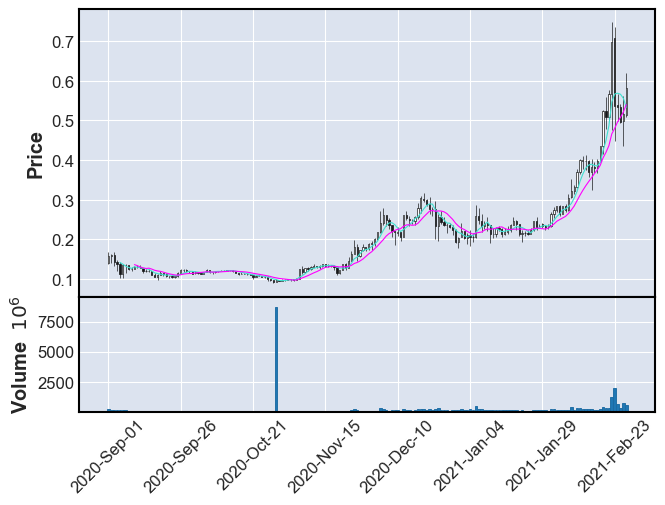

In [6]:
mpf.plot(temp_xem_df.loc['2020-9-1':], type='candle', mav=(5,10), volume=True)

## Price prediction

In [7]:
from fbprophet import Prophet

In [8]:
INPUT_FILE = "coin_NEM.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-9-1']

m = Prophet(changepoint_prior_scale=.7)
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
182,2021-03-02 23:59:59,0.580230,0.551584,0.613422
183,2021-03-03 23:59:59,0.590091,0.560436,0.623864
184,2021-03-04 23:59:59,0.598296,0.568887,0.632574
185,2021-03-05 23:59:59,0.614007,0.581674,0.646433
186,2021-03-06 23:59:59,0.624539,0.592496,0.661228


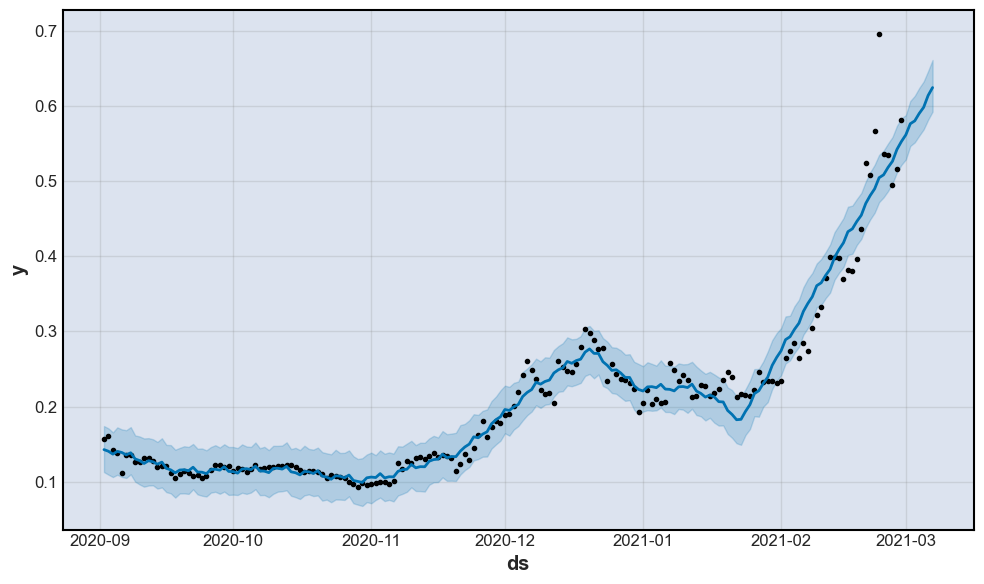

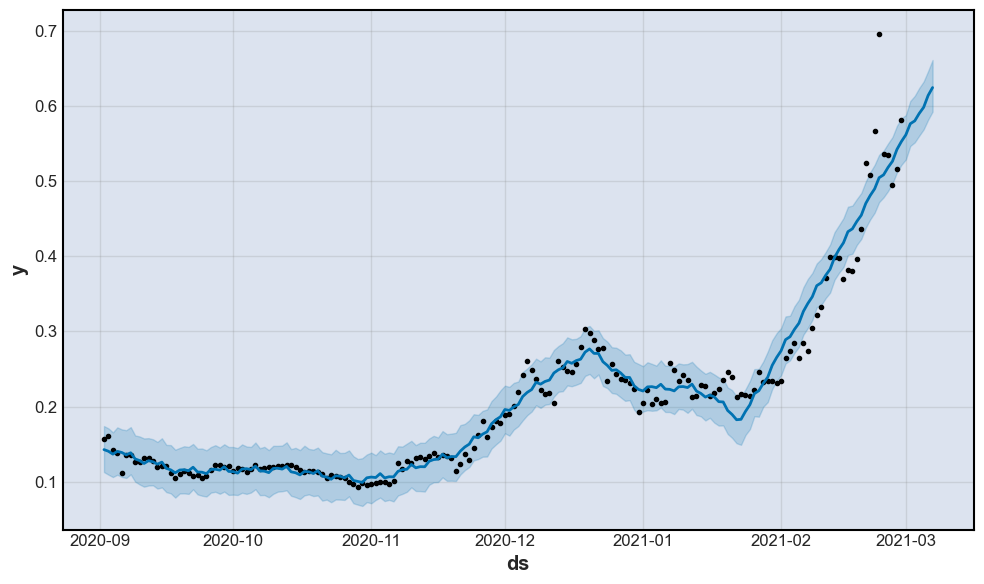

In [9]:
m.plot(forecast)

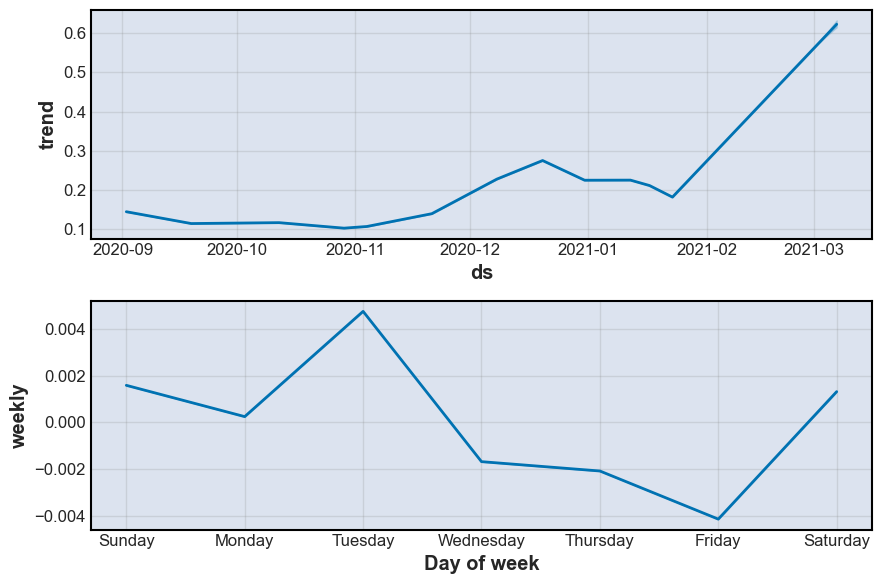

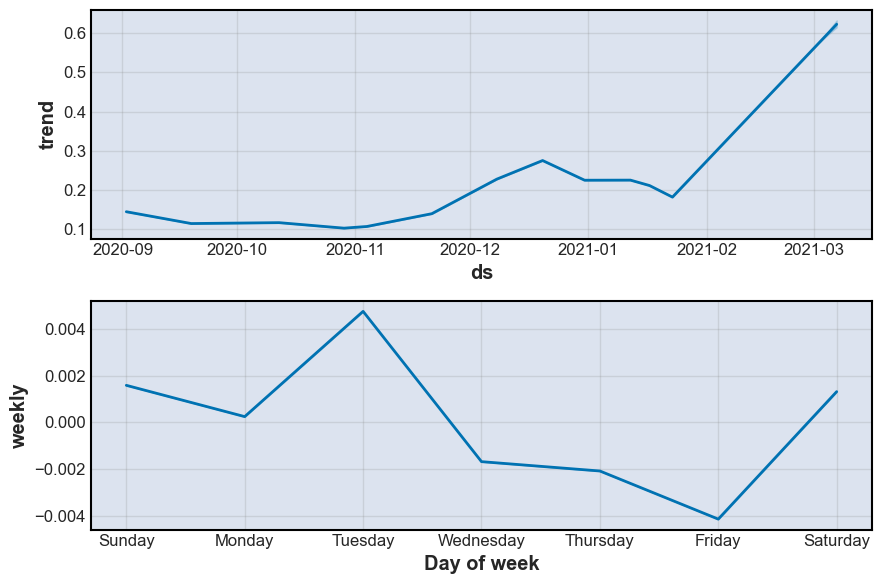

In [10]:
m.plot_components(forecast)